In [124]:
# Importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [125]:
# setting display option

pd.set_option("display.max_columns", 40)

In [126]:
# reading the dataset

lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [127]:
# Shape of the dataset

lead_df.shape

(9240, 37)

In [128]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [129]:
# Info on the dataset

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 Looks like we have missing values in a lot of columns, we will look at the missing values in terms of percentages

In [130]:
# Missing values in percentages

(lead_df.isnull().sum() / lead_df.shape[0]) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Columns with missing values

 - Lead Source
 - TotalVisits
 - Page Views Per Visit
 - Last Activity
 - Specialization
 - How did you hear about X Education
 - What is your current occupation
 - What matters most to you in choosing a course
 - Tags
 - Lead Quality
 - Lead Profile
 - City
 - Asymmetrique Activity Index
 - Asymmetrique Profile Index
 - Asymmetrique Activity Score
 - Asymmetrique Profile Index

## Treating Missing values

We will first look at the columns with relatively less missing values and probably drop the rows. We will then look at the columns with high number of missing values and by referring to the data dictionary or domain info from elsewhere we can either choose to drop the columns or impute the values accordingly

In [131]:
# looking at 'Lead Source'

lead_df[lead_df["Lead Source"].isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
836,b2dfb7a5-814d-465b-816e-63d6b3a863ca,651660,Lead Add Form,NaN,Yes,No,1,NaN,1378,NaN,Email Bounced,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,Modified
1569,1c87e9fd-c675-468e-9653-2cc968f077f2,643899,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
1746,215e9984-818a-42ff-ba1c-667ce73199a5,642394,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,Modified
2020,06f5b430-a45a-4de2-9aca-e13ee0a43589,640115,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
2025,e7524e35-923e-4c9f-800d-b18e1a6c5e3b,640081,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
2152,e54f76cc-2436-451c-8a29-fcd32ed7bed4,639134,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
2346,c309cc6d-204f-4ac0-a766-7d326bd01218,637125,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
2544,175611de-436d-11e6-b61b-22000aa8e760,635028,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,number not provided,Not Sure,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Email Opened
2601,bbe44370-ea5a-4e46-99d9-d32cfbd32199,634618,Quick Add Form,NaN,Yes,No,1,NaN,2217,NaN,Email Bounced,NaN,E-COMMERCE,Social Media,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Other Metro Cities,02.Medium,02.Medium,14.0,13.0,No,No,Modified
2676,bcfdd00e-99d2-4be1-b09b-a6260a63dade,633945,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,SMS Sent


In [132]:
# Dropping these values as the percentage of missing values is less

lead_df = lead_df[~lead_df["Lead Source"].isnull()]

In [133]:
lead_df.shape

(9204, 37)

In [134]:
# looking at columns where the missing values percentage is less than 13%

"""
TotalVisits
Page Views Per Visit
Last Activity
"""

for col in ["TotalVisits", "Page Views Per Visit", "Last Activity"]:
    lead_df = lead_df[~lead_df[col].isnull()]

lead_df.shape

(9074, 37)

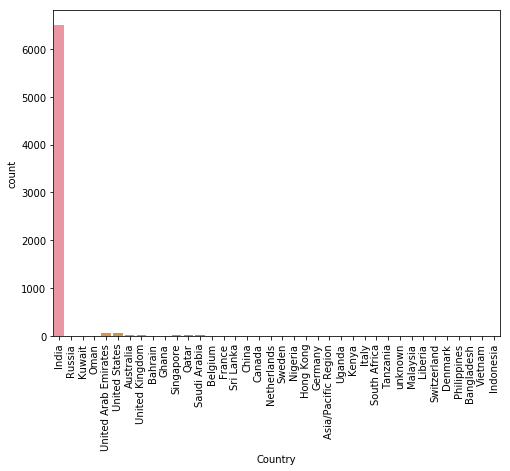

In [135]:
# Looking at columns with missing values less than 30 %

"""
Country
Specialization                               
How did you hear about X Education           
What is your current occupation              
What matters most to you in choosing a course
"""
plt.figure(figsize=(8, 6))
sns.countplot(lead_df.Country)
plt.xticks(rotation=90)
plt.show()

In [136]:
lead_df.Country.value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Sweden                     3
Uganda                     2
Bangladesh                 2
Philippines                2
China                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
Tanzania                   1
Denmark                    1
Indonesia                  1
Russia                     1
Sri Lanka                  1
Malaysia                   1
Kenya         

In [137]:
# looking at the country column value counts, 'India' is the mode
# hence we would be replacing the missing values with 'India'

lead_df.loc[lead_df.Country.isnull(), "Country"] = 'India'

lead_df[lead_df.Country.isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [138]:
lead_df.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Sweden                     3
Uganda                     2
Bangladesh                 2
Philippines                2
China                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
Tanzania                   1
Denmark                    1
Indonesia                  1
Russia                     1
Sri Lanka                  1
Malaysia                   1
Kenya         

In [139]:
# Looking at Specialization

lead_df.Specialization.value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [140]:
print(lead_df.shape)

(9074, 37)


In [141]:
# Replacing 'Select' and NaN values with 'Others' as 'Select' would mean the
# user has not provided specialization

lead_df["Specialization"] = np.where((lead_df.Specialization == 'Select') | (lead_df.Specialization.isnull()),
                                     'Others', lead_df.Specialization)

lead_df.Specialization.value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [142]:
lead_df.shape

(9074, 37)

In [143]:
# missing values are replaced
lead_df.Specialization.isnull().sum()

0

In [144]:
# looking at the missing values now

round((lead_df.isnull().sum() / lead_df.shape[0]) * 100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               24.25
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper 

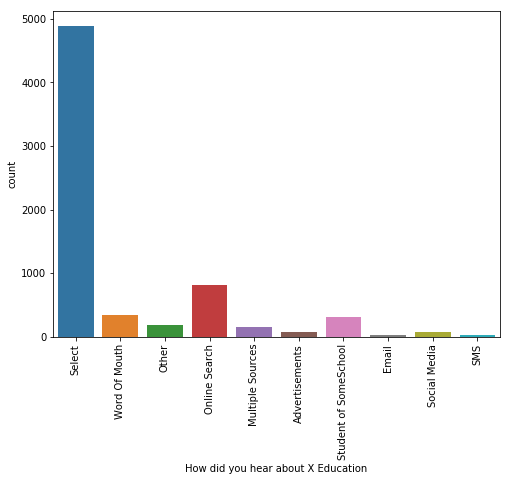

In [145]:
# looking at other columns with missing values

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["How did you hear about X Education"])
plt.xticks(rotation=90)
plt.show()

In [146]:
# Replacing 'Select' and NaN values with 'Others' as 'Select' would mean the
# user has not provided any choice

lead_df["How did you hear about X Education"] = np.where(
    (lead_df["How did you hear about X Education"] == 'Select') | (lead_df["How did you hear about X Education"].isnull()),
                                     'Others', lead_df["How did you hear about X Education"])

lead_df["How did you hear about X Education"].value_counts()

Others                   7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [147]:
lead_df["How did you hear about X Education"].isnull().sum()

0

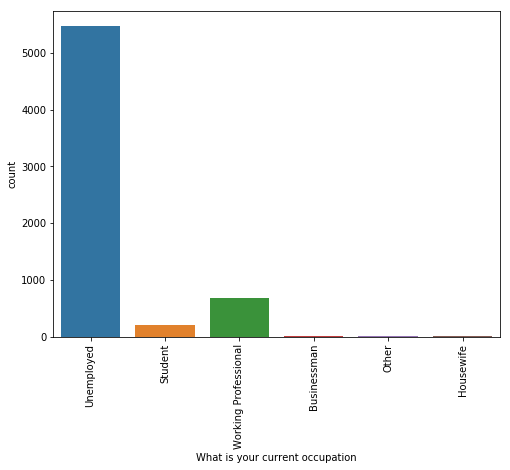

In [148]:
# Looking at "What is your current occupation"

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["What is your current occupation"])
plt.xticks(rotation=90)
plt.show()

In [149]:
# Replacing the Nan values with 'Unemployed'

lead_df.loc[lead_df["What is your current occupation"].isnull(), "What is your current occupation"] = "Unemployed"

lead_df["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [150]:
lead_df["What is your current occupation"].isnull().sum()

0

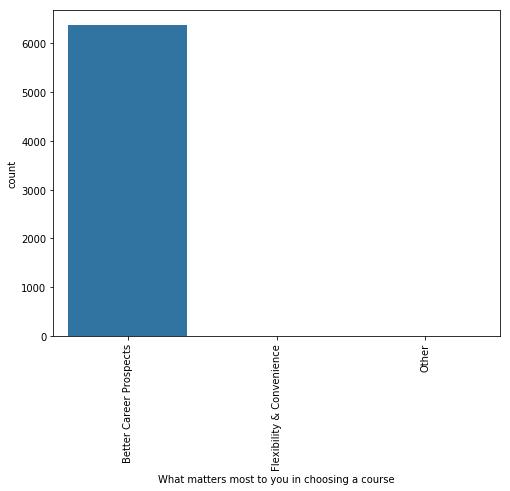

In [151]:
# Looking at "What matters most to you in choosing a course"

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["What matters most to you in choosing a course"])
plt.xticks(rotation=90)
plt.show()

In [152]:
# looking at value_counts for "What matters most to you in choosing a course"

lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [153]:
# Replacing the Nan values with "Better Career Prospects"

lead_df["What matters most to you in choosing a course"].fillna("Better Career Prospects", inplace=True)

lead_df["What matters most to you in choosing a course"].isnull().sum()

0

In [154]:
# Looking at the missing values again



In [155]:
round((lead_df.isnull().sum() / lead_df.shape[0]) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [156]:
# dropping the 'Tags' and 'Lead Quality' columns as one just indicates the current status and 
# the latter is based on the intuition of the employee

lead_df.drop(columns=["Tags", "Lead Quality"], inplace=True)

round((lead_df.isnull().sum() / lead_df.shape[0]) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

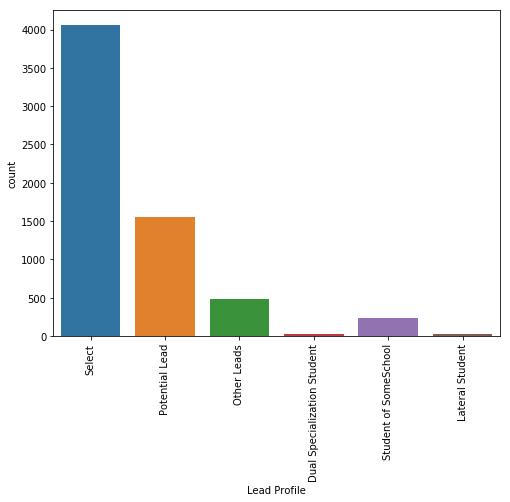

In [157]:
# Looking at Lead Profile

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["Lead Profile"])
plt.xticks(rotation=90)
plt.show()

In [158]:
# replacing the NaN and 'Select' values with 'Other Leads'

lead_df["Lead Profile"] = np.where(
    (lead_df["Lead Profile"] == 'Select') | (lead_df["Lead Profile"].isnull()),
                                     'Other Leads', lead_df["Lead Profile"])

lead_df["Lead Profile"].isnull().sum()

0

In [159]:
lead_df["Lead Profile"].value_counts()

Other Leads                    7239
Potential Lead                 1554
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

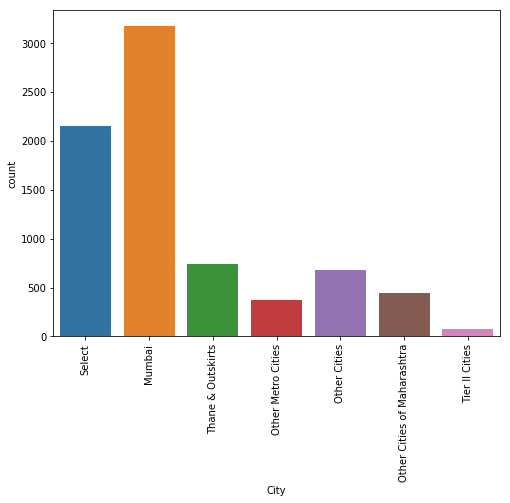

In [160]:
# Looking at City

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["City"])
plt.xticks(rotation=90)
plt.show()

In [161]:
# Replacing 'Select' and Nan values with 'Mumbai'

lead_df["City"] = np.where(
    (lead_df["City"] == 'Select') | (lead_df["City"].isnull()),
                                     'Mumbai', lead_df["City"])

lead_df["City"].isnull().sum()

0

In [162]:
lead_df["City"].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [163]:
lead_df.shape

(9074, 35)

### Dealing with Asymmetric columns